# Goal

Trying to classify Palmer Penguins by obtaining three features that will help to classify the penguins into their respective species type. The Palmer Penguins data set is a data set collected by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network. The data contains physiological measurements for a number of individuals from each of three species of penguins: Chinstrap, Gentoo, and Adelie

# Reading the Data 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

train_url = "https://raw.githubusercontent.com/middlebury-csci-0451/CSCI-0451/main/data/palmer-penguins/train.csv"
train = pd.read_csv(train_url)

After reading the data, we can see how the data looks like:

In [2]:
train.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,27,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N46A1,Yes,11/29/07,44.5,14.3,216.0,4100.0,NaN,7.96621,-25.69327,NaN
1,PAL0708,22,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N41A2,Yes,11/27/07,45.1,14.5,215.0,5000.0,FEMALE,7.63220,-25.46569,NaN
2,PAL0910,124,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N67A2,Yes,11/16/09,41.4,18.5,202.0,3875.0,MALE,9.59462,-25.42621,NaN
3,PAL0910,146,Adelie Penguin (Pygoscelis adeliae),Anvers,Dream,"Adult, 1 Egg Stage",N82A2,Yes,11/16/09,39.0,18.7,185.0,3650.0,MALE,9.22033,-26.03442,NaN
4,PAL0708,24,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N85A2,No,11/28/07,50.6,19.4,193.0,3800.0,MALE,9.28153,-24.97134,NaN


# Visualizing the DataSet

The graphs below shows the relation graph between Culmen Length and Flipper Length, classified by the Species of the Penguins and what Island they are from. From this graph we can see that Gentoo Penguins have bigger flipper lengths, than both Adelie Penguin and Chinstrap Penguins. We can also obtain that Adelie Penguins have Culmen Lengths shorter than Adelie Penguins and Chinstrap Penguins. But it is not possible to classify between Chinstrap Penguins and Adelie Penguins regarding Flipper Length, and also we cannot classify between Culmen Lengths of Gentoo Penguins and Chinstrap Penguins. 

The relationship between Gentoo Penguins and Adelie Penguins can be classified as linearly seperable but with the addition of Chinstrap Penguins we cannot classify the relationship linearly seperable no more as the data becomes clustered. The first graph helps to also show the Island of Biscoe does not have the species of Chinstrap, while the Island of Dream does not have the species of Gentoo, and lastly the Island of Torgersen does not have both species Gentoo and Chinstrap. 

Because of the multiple correlations between variables of each species type such as Chinstrap and Adelie regarding Flipper Lengths, and also Gentoo and Chinstrap regarding Culmen Lengths, our model would find it hard to identify Chinstrap from Adelie based on Flipper Lengths itself, and also Gentoo from Chinstrap based on Culmen Lengths.

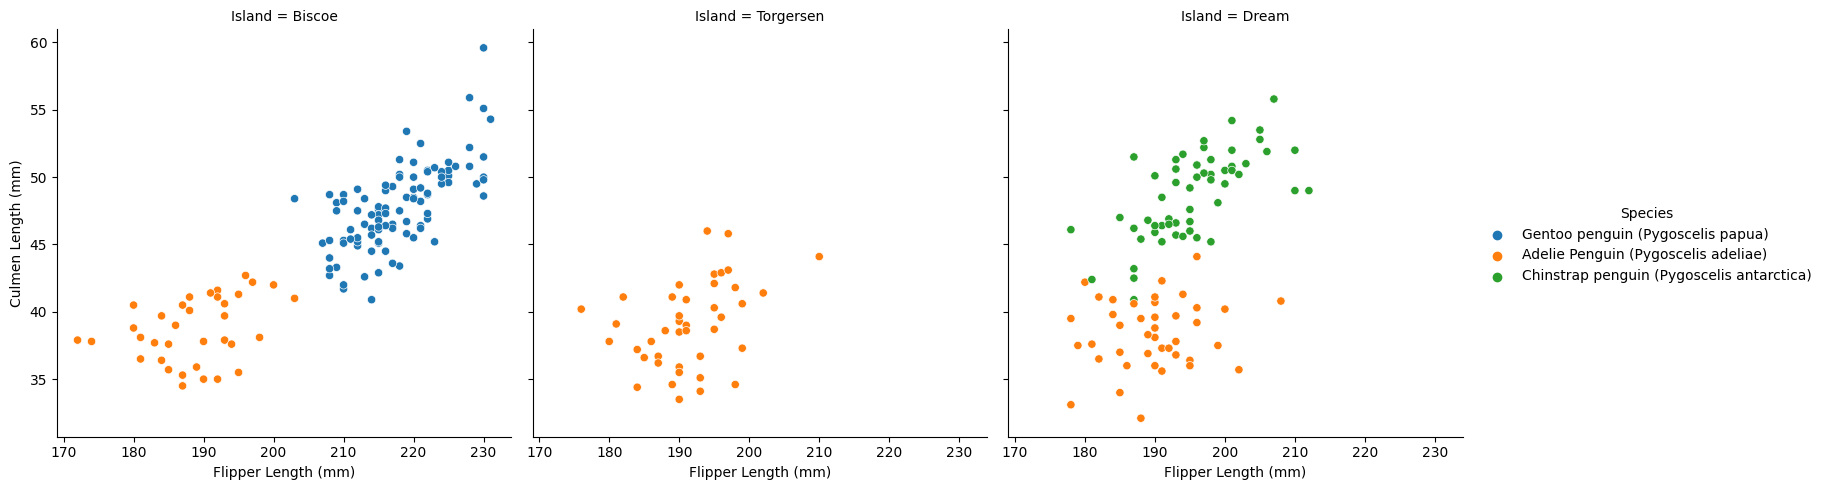

In [53]:
sns.relplot(data = train, y = 'Culmen Length (mm)', x =  'Flipper Length (mm)',  hue = 'Species', col = 'Island')

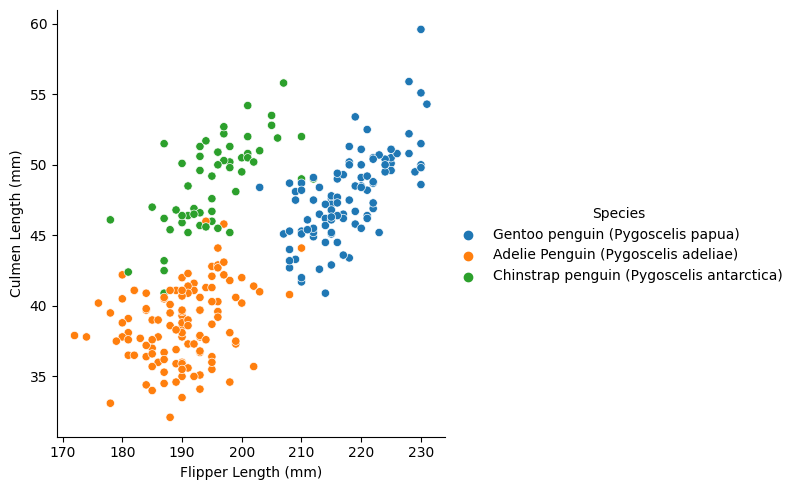

In [54]:
sns.relplot(data = train, y = 'Culmen Length (mm)', x =  'Flipper Length (mm)',  hue = 'Species')

The table below shows the Average Flipper Lengths, and Body Mass of the Species based on their Sex. We can see from the table that Gentoo Penguins have a greater body mass then both Chinstrap and Adelie Penguins, while Male Adelie Penguins have greater body mass then Chinstrap Penguins. The table also shows that Gentoo Penguins also have greater Flipper Lengths then the other two species while Male Adelie Penguins have greater flipper lengths then the female Chinstrap Penguins. 

Using this table we can say that our model can classify between Gentoo Penguins from the rest but classifying the other two penguins using these two variables can be hard as they intersect in some instances. It canc lassify, but it will have to keep in track for each instance respective to it's Sex. 

In [70]:
train.groupby(['Species', 'Sex'])[['Flipper Length (mm)', 'Body Mass (g)']].mean()

Flipper Length (mm)  \
Species                                   Sex                           
Adelie Penguin (Pygoscelis adeliae)       FEMALE           187.719298   
                                          MALE             192.690909   
Chinstrap penguin (Pygoscelis antarctica) FEMALE           191.551724   
                                          MALE             199.666667   
Gentoo penguin (Pygoscelis papua)         FEMALE           212.928571   
                                          MALE             221.462963   

                                                  Body Mass (g)  
Species                                   Sex                    
Adelie Penguin (Pygoscelis adeliae)       FEMALE    3337.280702  
                                          MALE      4020.454545  
Chinstrap penguin (Pygoscelis antarctica) FEMALE    3514.655172  
                                          MALE      3936.111111  
Gentoo penguin (Pygoscelis papua)         FEMALE    4677.976190  
                                          MALE      5502.314815

# Cleaning the DataSet

Dropping irrelavent variables that will not help with our model, and preparing our data for training:

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train["Species"])

def prepare_data(df):
  df = df.drop(["studyName", "Sample Number", "Individual ID", "Date Egg", "Comments", "Region"], axis = 1)
  df = df[df["Sex"] != "."]
  df = df.dropna()
  y = le.transform(df["Species"])
  df = df.drop(["Species"], axis = 1)
  df = pd.get_dummies(df)
  return df, y

X_train, y_train = prepare_data(train)

# Feature Engineering

The code below takes in the given qualitative columns and quatitave columns and uses the variables to calculate the Logistic Regression scores for all combinations. Then it prints out the columns/variables with the best score, and the output below shows that the columns 'Island_Biscoe', 'Island_Dream', 'Island_Torgersen', 'Culmen Length (mm)', and 'Culmen Depth (mm)' are the best for the model to classify data as it outputs a score very close to 1.0.

In [73]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
# these are not actually all the columns: you'll 
# need to add any of the other ones you want to search for
all_qual_cols = ["Clutch Completion", "Sex", "Island"]
all_quant_cols = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']

best_score = 0
LR = LogisticRegression()

for qual in all_qual_cols: 
  qual_cols = [col for col in X_train.columns if qual in col ]
  for pair in combinations(all_quant_cols, 2):
    cols = qual_cols + list(pair) 
    LR.fit(X_train[cols], y_train)
    score = LR.score(X_train[cols], y_train)
    
    if score > best_score:
        best_column = cols
        best_score = score
        best_model = LR
    
print(best_column, best_score)

['Sex_FEMALE', 'Sex_MALE', 'Culmen Length (mm)', 'Culmen Depth (mm)'] 0.99609375


We can visualize the columns of our training data set, where 1 refers to the penguin belonging in that Island, and 0 states it doesn't:

In [33]:
X_train[cols]

,Island_Biscoe,Island_Dream,Island_Torgersen,Flipper Length (mm),Body Mass (g)
1,1,0,0,215.0,5000.0
2,0,0,1,202.0,3875.0
3,0,1,0,185.0,3650.0
4,0,1,0,193.0,3800.0
5,0,1,0,178.0,2900.0
...,...,...,...,...,...
269,0,1,0,190.0,3900.0
270,1,0,0,211.0,4800.0
271,0,0,1,187.0,3150.0
272,1,0,0,224.0,5350.0


Preparing our data for future testing:

In [44]:
test_url = "https://raw.githubusercontent.com/middlebury-csci-0451/CSCI-0451/main/data/palmer-penguins/test.csv"
test = pd.read_csv(test_url)

X_test, y_test = prepare_data(test)

# Function to plot our results

The code below creates a function that takes in the given model that we provide, and uses the testing/training datasets to display it in a nice region plot, which can help us visualize the classification properly. 

In [51]:
from matplotlib.patches import Patch

def plot_regions(model, X, y, title):
    
    x0 = X[X.columns[0]]
    x1 = X[X.columns[1]]
    qual_features = X.columns[2:]
    
    fig, axarr = plt.subplots(1, len(qual_features), figsize = (7, 3))

    # create a grid
    grid_x = np.linspace(x0.min(),x0.max(),501)
    grid_y = np.linspace(x1.min(),x1.max(),501)
    xx, yy = np.meshgrid(grid_x, grid_y)
    
    XX = xx.ravel()
    YY = yy.ravel()

    for i in range(len(qual_features)):
      XY = pd.DataFrame({
          X.columns[0] : XX,
          X.columns[1] : YY
      })

      for j in qual_features:
        XY[j] = 0

      XY[qual_features[i]] = 1

      p = model.predict(XY)
      p = p.reshape(xx.shape)
      
      
      # use contour plot to visualize the predictions
      axarr[i].contourf(xx, yy, p, cmap = "jet", alpha = 0.2, vmin = 0, vmax = 2)
      
      ix = X[qual_features[i]] == 1
      # plot the data
      axarr[i].scatter(x0[ix], x1[ix], c = y[ix], cmap = "jet", vmin = 0, vmax = 2)
      
      axarr[i].set(xlabel = X.columns[0], 
            ylabel  = X.columns[1])
      
      patches = []
      for color, spec in zip(["red", "green", "blue"], ["Adelie", "Chinstrap", "Gentoo"]):
        patches.append(Patch(color = color, label = spec))

      plt.legend(title = "Species", handles = patches, loc = "best")
    
      plt.title(title)
        
      plt.tight_layout()

# Testing/Training the Model

We can see from the result that the training dataset recieved about 97% accuracy which isn't bad at all, showing only overfitting between three-four penguins so overall our model did a good job solely based on the training. We can see that it does not overfit between Adelie and Gentoo, but does a very little bit for Gentoo and Chinstrap which is totally fine as we are able to see a proper classification of the penguins solely on the training.

Now we can see that the testing also obtained about 97% accuracy which also isn't bad at all, as it does not overfit much, as it only intersects for about one penguin which is acceptable hence our model is able to classify the penguins properly achieving about 97% accuracy. 

Score for training: 0.9765625
Score for testing: 0.9705882352941176


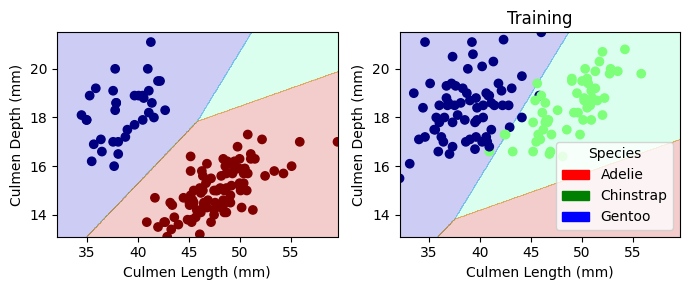

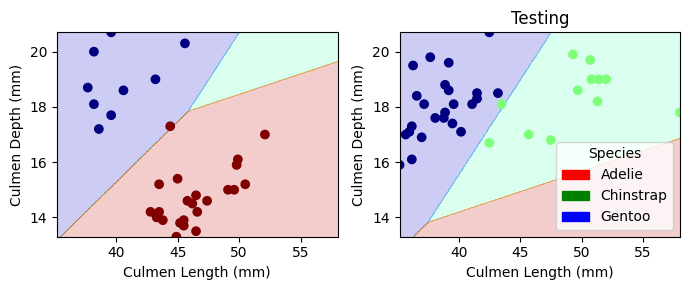

In [74]:
X_train["Island_Biscoe_No"] = X_train[["Island_Dream", "Island_Torgersen"]].sum(axis=1)
X_test["Island_Biscoe_No"] = X_test[["Island_Dream", "Island_Torgersen"]].sum(axis=1)

cols = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Island_Biscoe', 'Island_Biscoe_No']

LR = LogisticRegression()
LR.fit(X_train[cols], y_train)
score_train = LR.score(X_train[cols], y_train)
score_test = LR.score(X_test[cols], y_test)

print("Score for training: " + str(score_train))
plot_regions(LR, X_train[cols], y_train, title = 'Training')

print("Score for testing: " + str(score_test))
plot_regions(LR, X_test[cols], y_test, title = 'Testing')